In [1]:
!pip install tensorflow

In [2]:
import numpy as np

In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

C:\Users\heman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANELS=3

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato images",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 2 1]


In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())


[[[177. 176. 184.]
  [183. 182. 190.]
  [190. 189. 197.]
  ...
  [167. 164. 173.]
  [166. 163. 172.]
  [155. 152. 161.]]

 [[182. 181. 189.]
  [184. 183. 191.]
  [185. 184. 192.]
  ...
  [159. 156. 165.]
  [157. 154. 163.]
  [146. 143. 152.]]

 [[177. 176. 184.]
  [175. 174. 182.]
  [172. 171. 179.]
  ...
  [158. 155. 164.]
  [157. 154. 163.]
  [149. 146. 155.]]

 ...

 [[196. 193. 200.]
  [195. 192. 199.]
  [195. 192. 199.]
  ...
  [145. 142. 149.]
  [148. 145. 152.]
  [150. 147. 154.]]

 [[198. 195. 202.]
  [193. 190. 197.]
  [190. 187. 194.]
  ...
  [148. 145. 152.]
  [146. 143. 150.]
  [142. 139. 146.]]

 [[198. 195. 202.]
  [190. 187. 194.]
  [184. 181. 188.]
  ...
  [152. 149. 156.]
  [149. 146. 153.]
  [140. 137. 144.]]]


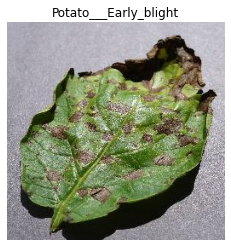

In [11]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [12]:
len(dataset)

68

In [13]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [14]:
train_ds = dataset.take(54)

In [15]:
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)

In [17]:
len(test_ds)

14

In [18]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [21]:
#combining above steps into a function
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds
    

In [22]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
EPOCHS=50

In [30]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50


54/54 [==============================] - 63s 969ms/step - loss: 0.9305 - accuracy: 0.4716 - val_loss: 0.9402 - val_accuracy: 0.4635
Epoch 2/50
54/54 [==============================] - 50s 923ms/step - loss: 0.8557 - accuracy: 0.5764 - val_loss: 0.7301 - val_accuracy: 0.6979
Epoch 3/50
54/54 [==============================] - 50s 927ms/step - loss: 0.6200 - accuracy: 0.7297 - val_loss: 0.5038 - val_accuracy: 0.8125
Epoch 4/50
54/54 [==============================] - 50s 922ms/step - loss: 0.5186 - accuracy: 0.7743 - val_loss: 0.6999 - val_accuracy: 0.6667
Epoch 5/50
54/54 [==============================] - 50s 923ms/step - loss: 0.3828 - accuracy: 0.8426 - val_loss: 0.2913 - val_accuracy: 0.8802
Epoch 6/50
54/54 [==============================] - 50s 933ms/step - loss: 0.4029 - accuracy: 0.8443 - val_loss: 0.3593 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 50s 924ms/step - loss: 0.2937 - accuracy: 0.8935 - val_loss: 0.3976 - val_accuracy: 0.82

In [31]:
model.evaluate(test_ds)

8/8 [==============================] - 8s 256ms/step - loss: 0.1825 - accuracy: 0.9414


[0.1825479418039322, 0.94140625]

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
#plotting accuracy
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

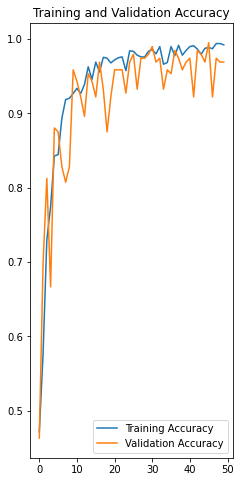

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
image's actual label: Potato___Early_blight
1/1 [==============================] - 1s 615ms/step
batch prediction first image Potato___Early_blight


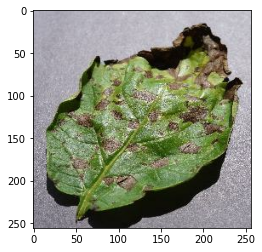

In [35]:
for images_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    print('first image to predict')
    plt.imshow(first_image)
    print("image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("batch prediction first image",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)#create a batch 
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    

1/1 [==============================] - 0s 81ms/step


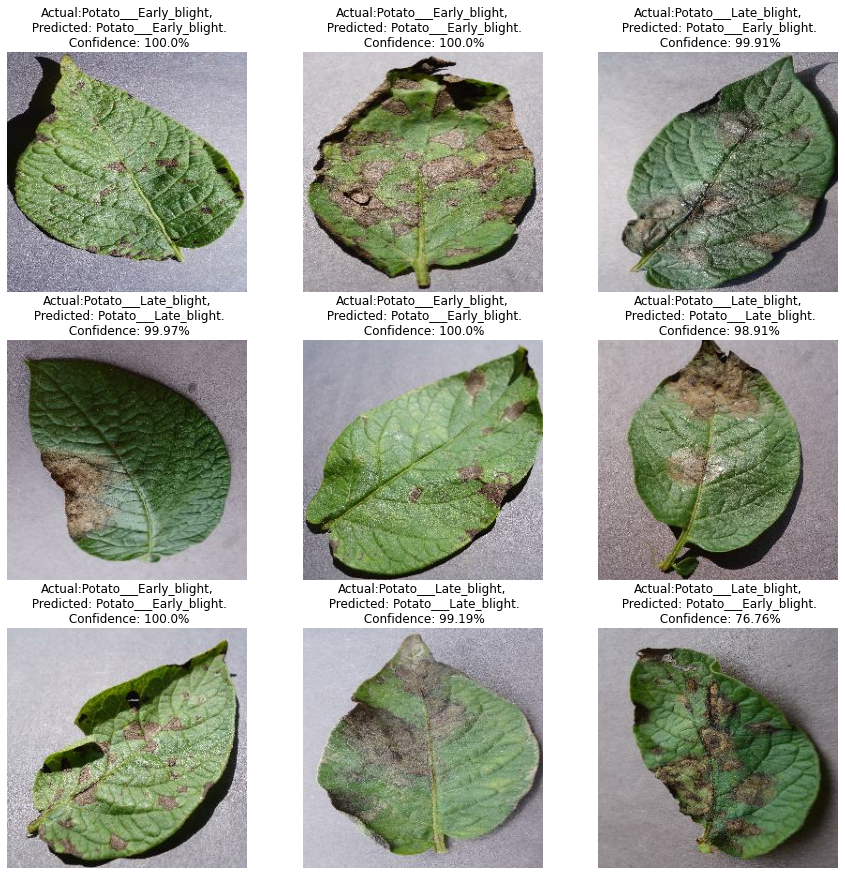

In [37]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence= predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        

In [38]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
